# Sample 2 - Use Catagory Predict

### Problem Statement

sample นี้จะใช้ข้อมูลที่กลุ่มประเภท​ (Catagory,Object) มาทดสอบว่าสามารถคาดเดาราคาของที่พักได้หรือไม่

# Import Package

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
plt.style.use("ggplot")
import json
import missingno as msno

from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.dummy import DummyRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict,cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

from fastai import *
from fastai.tabular import *
from fastai.test_utils import *

/Users/meepoom/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


# Import Data

In [2]:
df_district = pd.read_csv('Meterial/bangkok_district.csv')
df_train = pd.read_json('Meterial/train.json')
df_test = pd.read_json('Meterial/test.json')

In [3]:
print(df_train.shape)
print(df_district.shape)
print(df_test.shape)

(14271, 23)
(331, 6)
(2500, 22)


In [4]:
# Data Train to predict price
df_train.keys()

Index(['id', 'province', 'district', 'subdistrict', 'address', 'property_type',
       'total_units', 'bedrooms', 'baths', 'floor_area', 'floor_level',
       'land_area', 'latitude', 'longitude', 'nearby_stations',
       'nearby_station_distance', 'nearby_bus_stops', 'nearby_supermarkets',
       'nearby_shops', 'year_built', 'month_built', 'facilities', 'price'],
      dtype='object')

In [5]:
# Data Test need to predict Price
df_test.keys()

Index(['id', 'province', 'district', 'subdistrict', 'address', 'property_type',
       'total_units', 'bedrooms', 'baths', 'floor_area', 'floor_level',
       'land_area', 'latitude', 'longitude', 'nearby_stations',
       'nearby_station_distance', 'nearby_bus_stops', 'nearby_supermarkets',
       'nearby_shops', 'year_built', 'month_built', 'facilities'],
      dtype='object')

In [6]:
df_train['district'].unique()

array(['Watthana', 'Khlong Toei', 'Bang Kruai', 'Mueang Nonthaburi',
       'Bang Rak', 'Pak Kret', 'Sai Mai', 'Pathum Wan', 'Chatuchak',
       'Mueang Samut Prakan', 'Prawet', 'Bang Bua Thong', 'Huai Khwang',
       'Phra Khanong', 'Suan Luang', 'Bangkok Yai', 'Bueng Kum',
       'Bang Kapi', 'Nong Khaem', 'Bang Phli', 'Khan Na Yao',
       'Phra Samut Jadee', 'Bang Yai', 'Phaya Thai', 'Bang Sao Thong',
       'Saphan Sung', 'Din Daeng', 'Don Mueang', 'Ratchathewi',
       'Thon Buri', 'Bang Phlat', 'Min Buri', 'Lak Si', 'Khlong Sam Wa',
       'Yan Nawa', 'Sai Noi', 'Bang Na', 'Bang Khen', 'Phra Pradaeng',
       'Lat Phrao', 'Bang Sue', 'Khlong San', 'Bangkok Noi',
       'Phasi Charoen', 'Chom Thong', 'Lat Krabang', 'Wang Thonglang',
       'Bang Khun Thian', 'Nong Chok', 'Bang Kho Laem', 'Bang Bo',
       'Sathon', 'Rat Burana', 'Thung Khru', 'Bang Khae',
       'Thawi Watthana', 'Bang Bon', 'Taling Chan'], dtype=object)

In [7]:
df_train.describe()

,id,total_units,bedrooms,baths,floor_area,floor_level,land_area,latitude,longitude,nearby_stations,nearby_bus_stops,nearby_supermarkets,nearby_shops,year_built,price
count,1.427100e+04,10509.000000,14228.000000,14236.000000,14271.000000,8093.000000,4917.000000,14271.000000,14271.000000,14271.000000,6009.000000,13885.000000,14271.000000,14271.000000,1.427100e+04
mean,1.062614e+07,712.655438,1.880728,1.618292,79.867283,11.322995,242.963596,13.762814,100.565017,0.956415,14.049426,9.002161,10.447060,1422.737440,4.044124e+06
std,8.030103e+05,554.558340,1.092817,0.872875,69.701181,9.064835,3083.223006,0.092787,0.089575,1.085255,6.496828,5.348001,6.950903,917.737592,2.179909e+06
min,1.025114e+06,1.000000,1.000000,0.000000,1.000000,1.000000,16.000000,13.517062,100.273931,0.000000,1.000000,1.000000,1.000000,0.000000,4.800000e+05
25%,1.064588e+07,318.000000,1.000000,1.000000,32.000000,4.000000,80.000000,13.705177,100.512628,0.000000,8.000000,5.000000,4.000000,0.000000,2.250000e+06
50%,1.086984e+07,554.000000,1.000000,1.000000,47.000000,8.000000,116.000000,13.753742,100.569721,1.000000,17.000000,8.000000,9.000000,2013.000000,3.500000e+06
75%,1.097710e+07,945.000000,3.000000,2.000000,112.000000,17.000000,212.000000,13.837514,100.608786,2.000000,20.000000,13.000000,19.000000,2017.000000,5.500000e+06
max,1.104790e+07,4000.000000,10.000000,9.000000,766.000000,55.000000,137664.000000,14.022246,100.905485,3.000000,20.000000,20.000000,20.000000,2023.000000,9.999000e+06


In [8]:
df_test.describe()

,id,total_units,bedrooms,baths,floor_area,floor_level,land_area,latitude,longitude,nearby_stations,nearby_bus_stops,nearby_supermarkets,nearby_shops,year_built
count,2.500000e+03,1858.000000,2490.000000,2490.000000,2500.000000,1401.000000,841.000000,2500.000000,2500.000000,2500.000000,1026.000000,2414.000000,2500.000000,2500.000000
mean,1.063709e+07,713.160388,1.848193,1.601205,77.423200,11.233405,151.491082,13.762411,100.564914,0.946400,14.254386,9.140431,10.494400,1433.655600
std,7.743160e+05,577.473009,1.081384,0.854877,66.966167,8.885489,132.335460,0.092938,0.091116,1.069946,6.551753,5.439392,6.955208,912.882062
min,1.755218e+06,1.000000,1.000000,0.000000,17.000000,1.000000,20.000000,13.521062,100.052922,0.000000,1.000000,1.000000,1.000000,0.000000
25%,1.066092e+07,306.000000,1.000000,1.000000,31.000000,4.000000,80.000000,13.704274,100.514235,0.000000,8.000000,5.000000,4.000000,0.000000
50%,1.087636e+07,539.000000,1.000000,1.000000,46.000000,8.000000,112.000000,13.754998,100.571334,1.000000,17.000000,8.000000,9.000000,2013.000000
75%,1.098185e+07,954.000000,3.000000,2.000000,110.000000,17.000000,204.000000,13.838146,100.608291,2.000000,20.000000,13.000000,20.000000,2017.000000
max,1.104783e+07,4000.000000,10.000000,6.000000,564.000000,49.000000,2516.000000,14.095025,100.892813,3.000000,20.000000,20.000000,20.000000,2023.000000


# EDA (Train & Test)

### Data Train

In [9]:
data_train = df_train[['province', 'district', 'subdistrict','property_type','total_units','bedrooms','baths','floor_area','floor_level','nearby_supermarkets','nearby_shops','price']]
data_train["num_facility"] = df_train["facilities"].apply(len)

data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14271 entries, 0 to 14270
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   province             14271 non-null  object 
 1   district             14271 non-null  object 
 2   subdistrict          14260 non-null  object 
 3   property_type        14271 non-null  object 
 4   total_units          10509 non-null  float64
 5   bedrooms             14228 non-null  float64
 6   baths                14236 non-null  float64
 7   floor_area           14271 non-null  int64  
 8   floor_level          8093 non-null   float64
 9   nearby_supermarkets  13885 non-null  float64
 10  nearby_shops         14271 non-null  int64  
 11  price                14271 non-null  int64  
 12  num_facility         14271 non-null  int64  
dtypes: float64(5), int64(4), object(4)
memory usage: 1.4+ MB


/var/folders/mf/6mt5qmss0f96q77c2c1530ch0000gn/T/ipykernel_2707/2666788323.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train["num_facility"] = df_train["facilities"].apply(len)


### Data Test

In [10]:
# Data to test

data_test = df_test[['id','province', 'district', 'subdistrict','property_type','total_units','bedrooms','baths','floor_area','floor_level','nearby_supermarkets','nearby_shops']]
data_test["num_facility"] = df_train["facilities"].apply(len)

data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   2500 non-null   int64  
 1   province             2500 non-null   object 
 2   district             2500 non-null   object 
 3   subdistrict          2497 non-null   object 
 4   property_type        2500 non-null   object 
 5   total_units          1858 non-null   float64
 6   bedrooms             2490 non-null   float64
 7   baths                2490 non-null   float64
 8   floor_area           2500 non-null   int64  
 9   floor_level          1401 non-null   float64
 10  nearby_supermarkets  2414 non-null   float64
 11  nearby_shops         2500 non-null   int64  
 12  num_facility         2500 non-null   int64  
dtypes: float64(5), int64(4), object(4)
memory usage: 254.0+ KB


/var/folders/mf/6mt5qmss0f96q77c2c1530ch0000gn/T/ipykernel_2707/1944823157.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test["num_facility"] = df_train["facilities"].apply(len)


In [11]:
def flag_by_value (value):
    if value > 0:
        return 1
    else:
        return 0

### Replace missing value by Mean in each catagory

In [12]:
data_train['total_units'].fillna(data_train.groupby(["property_type"])["total_units"].transform('mean'), inplace = True)
data_test['total_units'].fillna(data_test.groupby(["property_type"])["total_units"].transform('mean'), inplace = True)

data_train['bedrooms'].fillna(data_train.groupby(["property_type"])["bedrooms"].transform('mean'), inplace = True)
data_test['bedrooms'].fillna(data_test.groupby(["property_type"])["bedrooms"].transform('mean'), inplace = True)

data_train['baths'].fillna(data_train.groupby(["property_type"])["baths"].transform('mean'), inplace = True)
data_test['baths'].fillna(data_test.groupby(["property_type"])["baths"].transform('mean'), inplace = True)

data_train['floor_level'].fillna(data_train.groupby(["property_type"])["floor_level"].transform('mean'), inplace = True)
data_test['floor_level'].fillna(data_test.groupby(["property_type"])["floor_level"].transform('mean'), inplace = True)

data_train['nearby_supermarkets'].fillna(data_train.groupby(["property_type"])["nearby_supermarkets"].transform('mean'), inplace = True)
data_test['nearby_supermarkets'].fillna(data_test.groupby(["property_type"])["nearby_supermarkets"].transform('mean'), inplace = True)


/var/folders/mf/6mt5qmss0f96q77c2c1530ch0000gn/T/ipykernel_2707/1637906010.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['total_units'].fillna(data_train.groupby(["property_type"])["total_units"].transform('mean'), inplace = True)
/var/folders/mf/6mt5qmss0f96q77c2c1530ch0000gn/T/ipykernel_2707/1637906010.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test['total_units'].fillna(data_test.groupby(["property_type"])["total_units"].transform('mean'), inplace = True)
/var/folders/mf/6mt5qmss0f96q77c2c1530ch0000gn/T/ipykernel_2707/1637906010.py:4: SettingWithCopyWarning: 
A value is trying to be se

### Create Function to Flag Facility & Station

In [13]:
# Function find Near station and distanct !! if no station = NaN
def closest_station(station_list, return_value='station_name'):
    if type(station_list) != list:
        if return_value == 'station_name':
            return "NO STATION"
        elif return_value == 'station_distance':
            return np.nan
    else:
        if return_value == 'station_name':
            return station_list[0][0]
        elif return_value == 'station_distance':
            return station_list[0][1]

#data_train['distance'] = data_train.apply(distance, axis=1)
#data_train['closest_station_name'] = df_train.nearby_station_distance.apply(lambda x: closest_station(x, 'station_name'))
data_train['closest_station_distance'] = df_train.nearby_station_distance.apply(lambda x: closest_station(x, 'station_distance'))
data_test['closest_station_distance'] = df_test.nearby_station_distance.apply(lambda x: closest_station(x, 'station_distance'))

/var/folders/mf/6mt5qmss0f96q77c2c1530ch0000gn/T/ipykernel_2707/1932124695.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['closest_station_distance'] = df_train.nearby_station_distance.apply(lambda x: closest_station(x, 'station_distance'))
/var/folders/mf/6mt5qmss0f96q77c2c1530ch0000gn/T/ipykernel_2707/1932124695.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test['closest_station_distance'] = df_test.nearby_station_distance.apply(lambda x: closest_station(x, 'station_distance')

##### Replace close station with mean in each property_type

In [14]:
data_train['closest_station_distance'].fillna(data_train.groupby(["property_type"])["closest_station_distance"].transform('mean'), inplace = True)
data_test['closest_station_distance'].fillna(data_test.groupby(["property_type"])["closest_station_distance"].transform('mean'), inplace = True)

/var/folders/mf/6mt5qmss0f96q77c2c1530ch0000gn/T/ipykernel_2707/980912694.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['closest_station_distance'].fillna(data_train.groupby(["property_type"])["closest_station_distance"].transform('mean'), inplace = True)
/var/folders/mf/6mt5qmss0f96q77c2c1530ch0000gn/T/ipykernel_2707/980912694.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test['closest_station_distance'].fillna(data_test.groupby(["property_type"])["closest_station_distance"].transform('mean'), inplace = True)


In [15]:
# Function Create Flag if selet field have value > 0 Then 1 Else 0
def flag_by_value (value):
    if value > 0:
        return 1
    else:
        return 0

In [16]:
# Apply the function to the entire DataFrame
data_train['flag_facility'] = data_train['num_facility'].apply(flag_by_value)
data_train['flag_station'] = data_train['closest_station_distance'].apply(flag_by_value)

data_test['flag_facility'] = data_test['num_facility'].apply(flag_by_value)
data_test['flag_station'] = data_test['closest_station_distance'].apply(flag_by_value)

/var/folders/mf/6mt5qmss0f96q77c2c1530ch0000gn/T/ipykernel_2707/2146967705.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['flag_facility'] = data_train['num_facility'].apply(flag_by_value)
/var/folders/mf/6mt5qmss0f96q77c2c1530ch0000gn/T/ipykernel_2707/2146967705.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['flag_station'] = data_train['closest_station_distance'].apply(flag_by_value)
/var/folders/mf/6mt5qmss0f96q77c2c1530ch0000gn/T/ipykernel_2707/2146967705.py:5: SettingWit

### Check Data again after cleansing

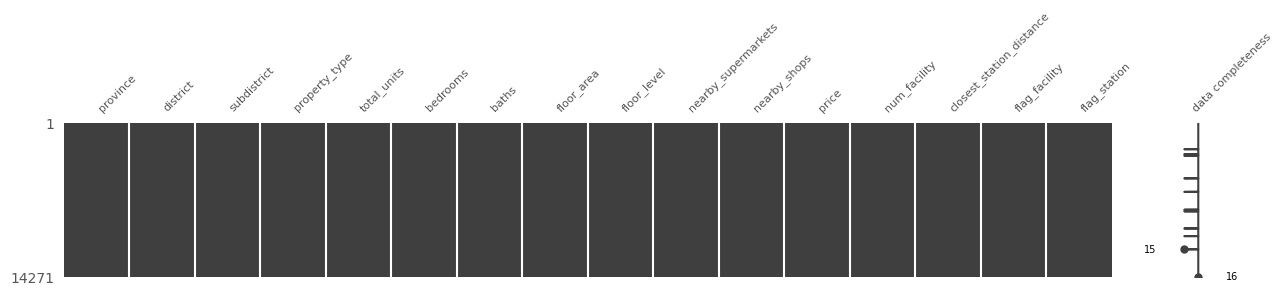

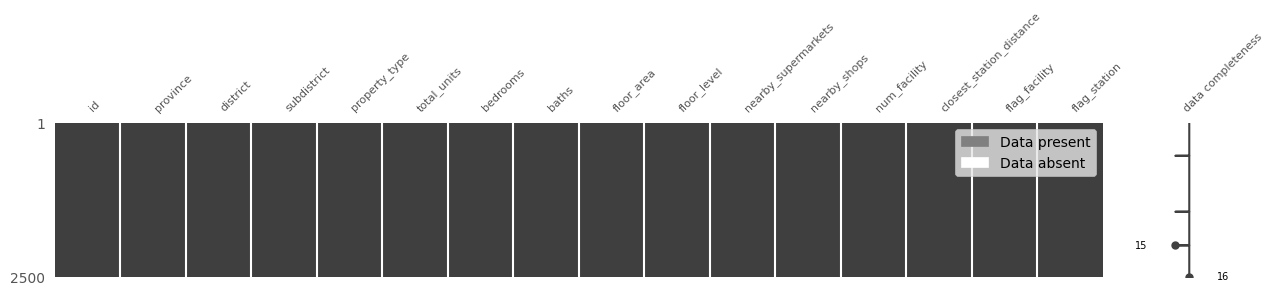

In [17]:
#Check Null Value
msno.matrix(data_train, figsize=(15,2),fontsize=8,labels="Data Train") ;
#plt.legend(['missing','not missing'], bbox_to_anchor=(1, 0.5))
msno.matrix(data_test, figsize=(15,2),fontsize=8,labels="Data Predict") ;
gray_patch = mpatches.Patch(color='gray', label='Data present')
white_patch = mpatches.Patch(color='white', label='Data absent ')
plt.legend(handles=[gray_patch, white_patch])

#### Decare total data type

In [18]:
## หาจำนวนของแต่ละ Data Type : Data Train
obj = (data_train.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Data Train")
print("Categorical variables:",len(object_cols))
 
int_ = (data_train.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:",len(num_cols))
 
fl = (data_train.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:",len(fl_cols))

Data Train
Categorical variables: 4
Integer variables: 6
Float variables: 6


In [19]:
## หาจำนวนของแต่ละ Data Type : Data Test
obj = (data_test.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Data Test")
print("Categorical variables:",len(object_cols))
 
int_ = (data_test.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:",len(num_cols))
 
fl = (data_test.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:",len(fl_cols))

Data Test
Categorical variables: 4
Integer variables: 6
Float variables: 6


#### Check total of data

<Axes: title={'center': 'No. Unique values of Categorical Features'}>

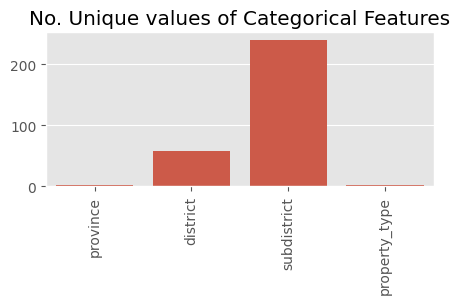

In [20]:
unique_values = []
for col in object_cols:
  unique_values.append(data_train[col].unique().size)
plt.figure(figsize=(5,2))
plt.title('No. Unique values of Categorical Features')
plt.xticks(rotation=90)
sns.barplot(x=object_cols,y=unique_values)


/Users/meepoom/Library/Python/3.9/lib/python/site-packages/IPython/core/events.py:93: UserWarning: Glyph 3648 (\N{THAI CHARACTER SARA E}) missing from current font.
  func(*args, **kwargs)
/Users/meepoom/Library/Python/3.9/lib/python/site-packages/IPython/core/events.py:93: UserWarning: Glyph 3617 (\N{THAI CHARACTER MO MA}) missing from current font.
  func(*args, **kwargs)
/Users/meepoom/Library/Python/3.9/lib/python/site-packages/IPython/core/events.py:93: UserWarning: Glyph 3639 (\N{THAI CHARACTER SARA UEE}) missing from current font.
  func(*args, **kwargs)
/Users/meepoom/Library/Python/3.9/lib/python/site-packages/IPython/core/events.py:93: UserWarning: Glyph 3629 (\N{THAI CHARACTER O ANG}) missing from current font.
  func(*args, **kwargs)
/Users/meepoom/Library/Python/3.9/lib/python/site-packages/IPython/core/events.py:93: UserWarning: Glyph 3591 (\N{THAI CHARACTER NGO NGU}) missing from current font.
  func(*args, **kwargs)
/Users/meepoom/Library/Python/3.9/lib/python/site-pack

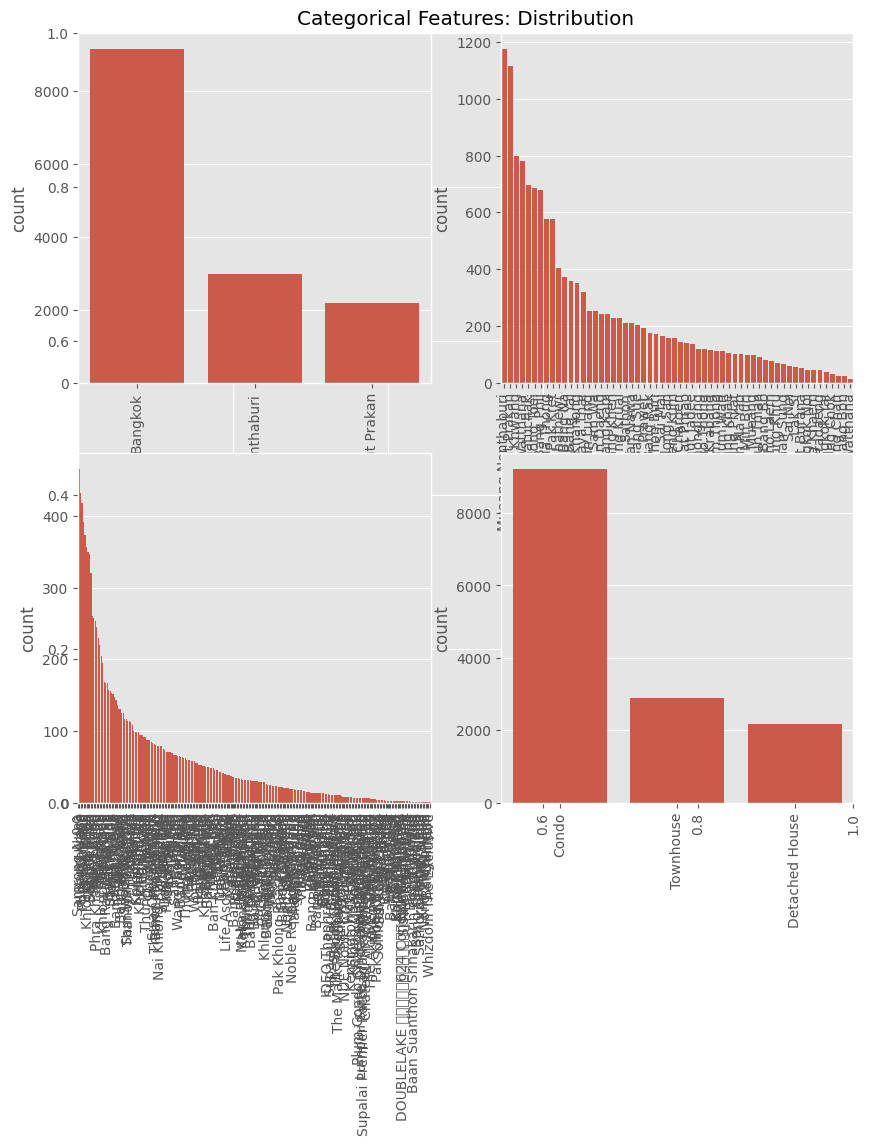

In [21]:
plt.figure(figsize=(10, 10))
plt.title('Categorical Features: Distribution')
plt.xticks(rotation=90)
index = 1
 
for col in object_cols:
    y = data_train[col].value_counts()
    plt.subplot(2, 2, index)
    plt.xticks(rotation=90)
    sns.barplot(x=list(y.index), y=y)
    index += 1

#### Drop Column subdistrict

In [22]:
data_train.drop(['subdistrict'], #subdistrict
             axis=1,
             inplace=True)

data_test.drop(['subdistrict'],
             axis=1,
             inplace=True)

/var/folders/mf/6mt5qmss0f96q77c2c1530ch0000gn/T/ipykernel_2707/2859036198.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train.drop(['subdistrict'], #subdistrict
/var/folders/mf/6mt5qmss0f96q77c2c1530ch0000gn/T/ipykernel_2707/2859036198.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test.drop(['subdistrict'],


In [23]:
# Show Feature = Categorical
print("Data Train : Categorical")
s = (data_train.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)
print('No. of. categorical features: ', 
      len(object_cols))


print("Data Test : Categorical")
s = (data_test.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)
print('No. of. categorical features: ', 
      len(object_cols))

Data Train : Categorical
Categorical variables:
['province', 'district', 'property_type']
No. of. categorical features:  3
Data Test : Categorical
Categorical variables:
['province', 'district', 'property_type']
No. of. categorical features:  3


#### Create Dummy for Classification 

In [24]:
OH_encoder = OneHotEncoder(sparse=False)
OH_cols = pd.DataFrame(OH_encoder.fit_transform(data_train[object_cols]))
OH_cols.index = data_train.index
OH_cols.columns = OH_encoder.get_feature_names_out()
df_final_train = data_train.drop(object_cols, axis=1)
df_final_train = pd.concat([df_final_train, OH_cols], axis=1)

OH_encoder = OneHotEncoder(sparse=False)
OH_cols = pd.DataFrame(OH_encoder.fit_transform(data_test[object_cols]))
OH_cols.index = data_test.index
OH_cols.columns = OH_encoder.get_feature_names_out()
df_final_test = data_test.drop(object_cols, axis=1)
df_final_test = pd.concat([df_final_test, OH_cols], axis=1)

/Users/meepoom/Library/Python/3.9/lib/python/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/meepoom/Library/Python/3.9/lib/python/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [25]:
df_final_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14271 entries, 0 to 14270
Data columns (total 76 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   total_units                   14271 non-null  float64
 1   bedrooms                      14271 non-null  float64
 2   baths                         14271 non-null  float64
 3   floor_area                    14271 non-null  int64  
 4   floor_level                   14271 non-null  float64
 5   nearby_supermarkets           14271 non-null  float64
 6   nearby_shops                  14271 non-null  int64  
 7   price                         14271 non-null  int64  
 8   num_facility                  14271 non-null  int64  
 9   closest_station_distance      14271 non-null  float64
 10  flag_facility                 14271 non-null  int64  
 11  flag_station                  14271 non-null  int64  
 12  province_Bangkok              14271 non-null  float64
 13  p

## Create Data for Training and Testing

In [26]:
# Final Data Train : 
X = df_final_train.drop(['price'], axis=1)
Y = df_final_train['price']
 
# Split the training set into 
# training and validation set
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, train_size=0.8, test_size=0.2, random_state=0)

# Model and Accuracy

## Model 1 - SVM

In [27]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_percentage_error
 
model_SVR = svm.SVR()
model_SVR.fit(X_train,Y_train)
Y_pred_SVR = model_SVR.predict(X_test)
 
print(mean_absolute_percentage_error(Y_test, Y_pred_SVR))

0.5343127696234882


### Model 1 - Result

In [28]:
# เทียบระหว่าง y_test กับ y_predict
# Mean Absolute Error (MAE)
mae_test = mean_absolute_error(Y_test, Y_pred_SVR)
print("Mean absolute error: %.3f" % mae_test)
# Mean Square Error
mse_test=mean_squared_error(Y_test, Y_pred_SVR)
print("Mean squared error: %.3f" % mse_test)

# R2-score: Explained variance (coefficient of determination) score: 1 is perfect prediction

r2_test= r2_score(Y_test, Y_pred_SVR)
print('R2-score: %.3f' % r2_test)

Mean absolute error: 1790854.351
Mean squared error: 5098265953762.881
R2-score: -0.065


## Model 2 - Random Forest Regression

In [29]:
from sklearn.ensemble import RandomForestRegressor
 
model_RFR = RandomForestRegressor(n_estimators=10)
model_RFR.fit(X_train, Y_train)
Y_pred_RFR = model_RFR.predict(X_test)
 
mean_absolute_percentage_error(Y_test, Y_pred_RFR)

0.16630640351832648

### Model 2 - Result

In [30]:
# เทียบระหว่าง y_test กับ y_predict
# Mean Absolute Error (MAE)
mae_test = mean_absolute_error(Y_test, Y_pred_RFR)
print("Mean absolute error: %.3f" % mae_test)
# Mean Square Error
mse_test=mean_squared_error(Y_test, Y_pred_RFR)
print("Mean squared error: %.3f" % mse_test)

# R2-score: Explained variance (coefficient of determination) score: 1 is perfect prediction

r2_test= r2_score(Y_test, Y_pred_RFR)
print('R2-score: %.3f' % r2_test)

Mean absolute error: 634538.565
Mean squared error: 924748709482.594
R2-score: 0.807


## Model 3 - Linear Regression

In [31]:
from sklearn.linear_model import LinearRegression
 
model_LR = LinearRegression()
model_LR.fit(X_train, Y_train)
Y_pred_LR = model_LR.predict(X_test)
 
print(mean_absolute_percentage_error(Y_test, Y_pred_LR))

0.2706170401110578


### Model 3 - Result

In [32]:
# เทียบระหว่าง y_test กับ y_predict
# Mean Absolute Error (MAE)
mae_test = mean_absolute_error(Y_test, Y_pred_LR)
print("Mean absolute error: %.3f" % mae_test)
# Mean Square Error
mse_test=mean_squared_error(Y_test, Y_pred_LR)
print("Mean squared error: %.3f" % mse_test)

# R2-score: Explained variance (coefficient of determination) score: 1 is perfect prediction

r2_test= r2_score(Y_test, Y_pred_LR)
print('R2-score: %.3f' % r2_test)

Mean absolute error: 948664.971
Mean squared error: 1606639657829.542
R2-score: 0.664


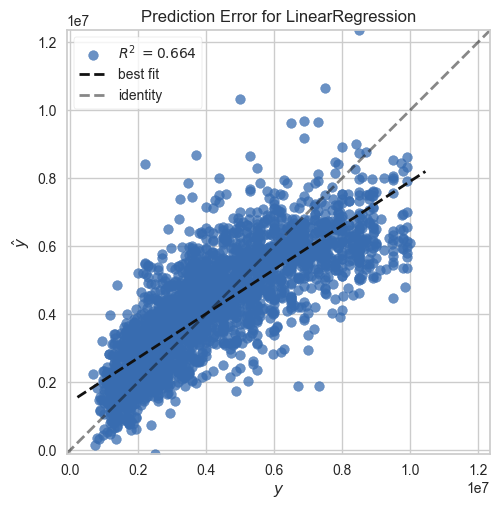

<Axes: title={'center': 'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [33]:
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import PredictionError
from yellowbrick.style import set_palette

set_palette('accent')
model = LinearRegression()
visualizer = PredictionError(model)

visualizer.fit(X_train, Y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, Y_test)  # Evaluate the model on the test data
visualizer.show()          

## Model 4 - Catboots Regression

In [34]:
from catboost import CatBoostRegressor
cb_model = CatBoostRegressor()
cb_model.fit(X_train, Y_train)
preds_cb = cb_model.predict(X_test) 
 
cb_r2_score=r2_score(Y_test, preds_cb)
cb_r2_score

Learning rate set to 0.060154
0:	learn: 2112419.1385292	total: 59.8ms	remaining: 59.7s
1:	learn: 2049954.9964797	total: 61ms	remaining: 30.4s
2:	learn: 1994307.9541927	total: 62.4ms	remaining: 20.7s
3:	learn: 1942801.3025622	total: 64.1ms	remaining: 16s
4:	learn: 1891615.8011331	total: 65.7ms	remaining: 13.1s
5:	learn: 1846167.2038064	total: 67.1ms	remaining: 11.1s
6:	learn: 1802594.3494846	total: 68.5ms	remaining: 9.71s
7:	learn: 1763164.0230978	total: 69.7ms	remaining: 8.65s
8:	learn: 1729754.5556888	total: 70.9ms	remaining: 7.81s
9:	learn: 1694728.5287814	total: 72.3ms	remaining: 7.16s
10:	learn: 1664181.6352589	total: 73.8ms	remaining: 6.63s
11:	learn: 1634814.5330384	total: 75ms	remaining: 6.18s
12:	learn: 1609002.0619030	total: 76.7ms	remaining: 5.82s
13:	learn: 1581836.1584075	total: 78.2ms	remaining: 5.51s
14:	learn: 1557572.1398865	total: 79.8ms	remaining: 5.24s
15:	learn: 1537198.8164978	total: 81.6ms	remaining: 5.02s
16:	learn: 1515863.9641862	total: 83.3ms	remaining: 4.81s


0.8172266309213451

### Model 4 - Result

In [35]:
# เทียบระหว่าง y_test กับ y_predict
# Mean Absolute Error (MAE)
mae_test = mean_absolute_error(Y_test, preds_cb)
print("Mean absolute error: %.3f" % mae_test)
# Mean Square Error
mse_test=mean_squared_error(Y_test, preds_cb)
print("Mean squared error: %.3f" % mse_test)

# R2-score: Explained variance (coefficient of determination) score: 1 is perfect prediction

r2_test= r2_score(Y_test, preds_cb)
print('R2-score: %.3f' % r2_test)

Mean absolute error: 660939.046
Mean squared error: 874644393411.685
R2-score: 0.817


Text(0, 0.5, 'Predictions')

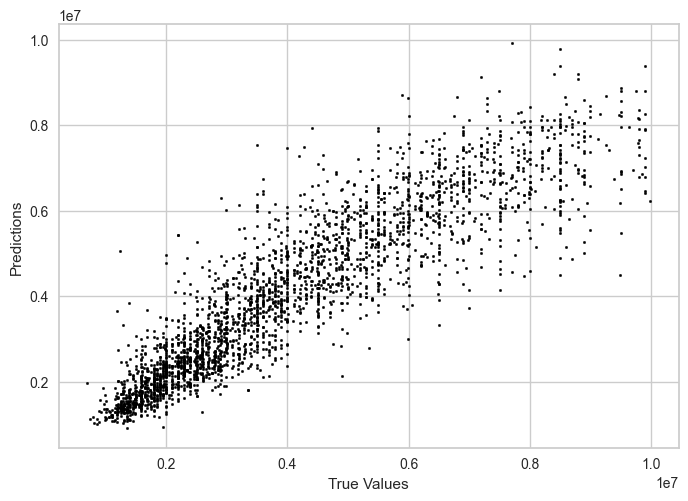

In [36]:
import matplotlib
colors = np.random.randint(100, size=(100))
plt.scatter(Y_test, preds_cb,s=3,color = 'black')
plt.xlabel('True Values')
plt.ylabel('Predictions')

## Model 5 - Lasso

In [37]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

In [38]:
lasso = Lasso(alpha=1.0)
lasso = lasso.fit(X_train_scaled, Y_train)

/Users/meepoom/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.137e+15, tolerance: 5.415e+12
  model = cd_fast.enet_coordinate_descent(


In [39]:
print("LR.coef_: \n {}".format(lasso.coef_))
print("LR.intercept_: {}".format(lasso.intercept_))

LR.coef_: 
 [-209642.72878929  367610.8380539   742098.51099256  624778.30914803
  347813.13376761  -15667.8512914   249046.30333804  344461.23293657
 -230178.25748527  -16333.63382475       0.          802090.00610298
   -9384.01807497    7451.59692421  -21272.0475581  -101907.17788642
 -161709.3531465  -164426.52770122 -151838.60331463 -186715.13348962
   47229.16153734 -168603.97895847   22197.20574648  -93750.42317831
  -91158.92160699  -27173.77210639  254350.16564726  -42086.9953874
  -93973.14064388  -87844.16582076  -70208.36650634  -33795.84219268
 -179700.81422132  -13525.73619838 -137221.17470645    1138.23532369
 -128742.67822952  -18392.56176027 -127477.86352645 -271698.22195861
   33576.40505223  306617.86344124  -67864.07493755 -149709.89612983
  -84554.51113657 -148718.40836924   32232.60482434  -22174.26682829
 -142668.6007015  -108802.32192622   36589.74158048  198411.41681105
 -125906.29805487   90441.32411062   16423.79272824   25040.8751496
  -79232.53741052 -14707

In [40]:
X_test_scaled = scaler.transform(X_test)
y_predict_ls = lasso.predict(X_test_scaled)

In [41]:
cross_val_score(Lasso(alpha=10), X_train, Y_train, cv=10)

/Users/meepoom/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.271e+15, tolerance: 4.876e+12
  model = cd_fast.enet_coordinate_descent(
/Users/meepoom/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.186e+15, tolerance: 4.856e+12
  model = cd_fast.enet_coordinate_descent(
/Users/meepoom/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing 

array([0.6486112 , 0.62868736, 0.66766212, 0.66294629, 0.66255421,
       0.64166777, 0.65938715, 0.64471548, 0.67757753, 0.6187298 ])

### Model 5 - Result

In [42]:
# Mean Absolute Error (MAE)
mae_test = mean_absolute_error(Y_test, y_predict_ls)
print("Mean absolute error: %.3f" % mae_test)

# The mean squared error
mse_test=mean_squared_error(Y_test, y_predict_ls)
print("Mean squared error: %.3f" % mse_test)

# R2-score: Explained variance score: 1 is perfect prediction
r2_test= r2_score(Y_test, y_predict_ls)
print('R2-score: %f' % r2_test)

Mean absolute error: 948665.123
Mean squared error: 1606639836338.242
R2-score: 0.664262


/Users/meepoom/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.989e+15, tolerance: 5.415e+12
  model = cd_fast.enet_coordinate_descent(


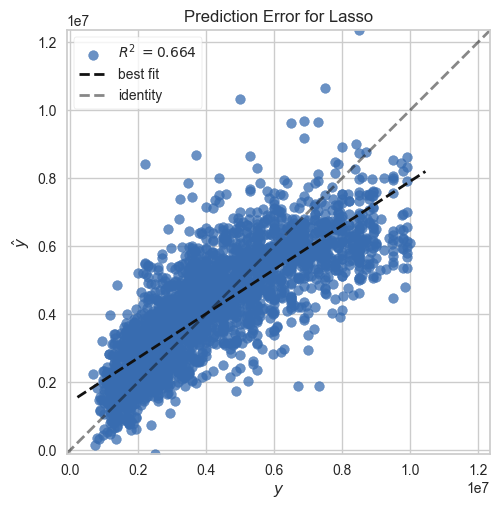

<Axes: title={'center': 'Prediction Error for Lasso'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [43]:
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import PredictionError
from yellowbrick.style import set_palette

set_palette('accent')
model = Lasso(alpha=1.0)
visualizer = PredictionError(model)

visualizer.fit(X_train, Y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, Y_test)  # Evaluate the model on the test data
visualizer.show()          

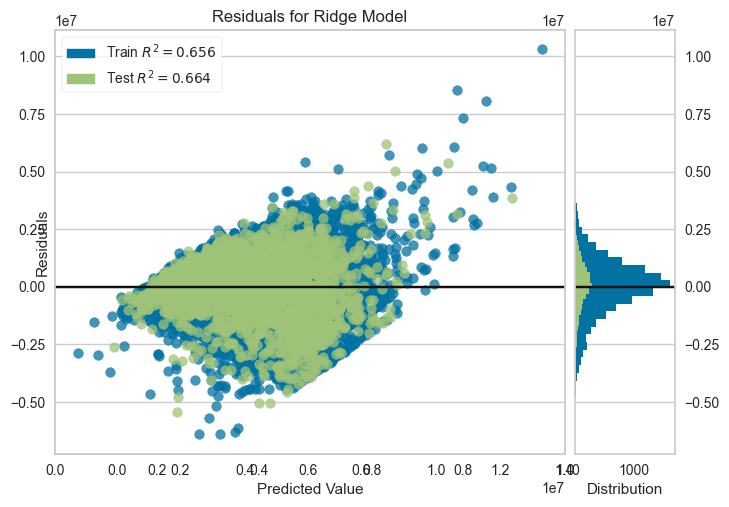

<Axes: title={'center': 'Residuals for Ridge Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [44]:
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import ResidualsPlot

model = Ridge()
visualizer = ResidualsPlot(model)

visualizer = ResidualsPlot(model)
visualizer.fit(X_train, Y_train)
visualizer.score(X_test, Y_test)
visualizer.show()

## Model 6 - Ridge

In [45]:
RR = Ridge(alpha=100.0)
RR = RR.fit(X_train, Y_train)
y_predict = RR.predict(X_test)

In [46]:
Ridge()

Ridge()

In [47]:
RR.get_params()

{'alpha': 100.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'positive': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.0001}

In [48]:
# show model parameters
print("RR.coef_: \n {}".format(RR.coef_))
print("RR.intercept_: {}".format(RR.intercept_))

RR.coef_: 
 [-5.87681709e+02  3.32615451e+05  8.18009257e+05  9.59634170e+03
  5.08167409e+04  1.66306529e+04  5.82273429e+04  8.30396654e+04
 -1.32183152e+03 -5.48370121e+04  0.00000000e+00  5.95616833e+05
 -3.35530056e+05 -2.60086777e+05 -2.33824450e+04 -2.76607391e+05
 -4.51060697e+05 -4.74172051e+05 -4.22736818e+05 -4.55706545e+05
  3.80509405e+05 -5.33613160e+05  3.09078991e+05 -3.99996952e+04
 -3.19510832e+05  8.60877712e+04  1.36487040e+06 -7.73489322e+04
 -1.29316343e+04 -3.13671094e+05 -2.23563789e+05  2.08733059e+04
 -5.29987347e+05  3.11329921e+05 -3.75526657e+05  1.99508377e+05
 -2.72344863e+05  1.77711860e+05 -3.37638229e+05 -6.36587007e+05
  2.89751095e+05  1.33527901e+06 -1.10815596e+05 -3.73410333e+05
 -4.06374272e+04 -3.66166798e+05  8.28718836e+04 -1.47182330e+05
 -3.82250528e+05 -2.46296843e+05  2.57535414e+05  1.13550590e+06
 -2.68959577e+05  5.94916881e+05  4.49316137e+05  1.53238957e+05
 -2.51499798e+05 -2.08755837e+05 -2.11066264e+05  1.08425007e+06
 -2.74739844e

In [49]:
print("Training set score: {:.3f}".format(RR.score(X_train, Y_train)))
print("Test set score: {:f}".format(RR.score(X_test, Y_test)))

Training set score: 0.626
Test set score: 0.637050


### Model 6 - Result

In [50]:
# Mean Absolute Error (MAE)
mae_test = mean_absolute_error(Y_test, y_predict)
print("Mean absolute error: %.3f" % mae_test)

# The mean squared error
mse_test=mean_squared_error(Y_test, y_predict)
print("Mean squared error: %.3f" % mse_test)

# R2-score: Explained variance score: 1 is perfect prediction
r2_test= r2_score(Y_test, y_predict)
print('R2-score: %f' % r2_test)

Mean absolute error: 999230.650
Mean squared error: 1736860192563.077
R2-score: 0.637050


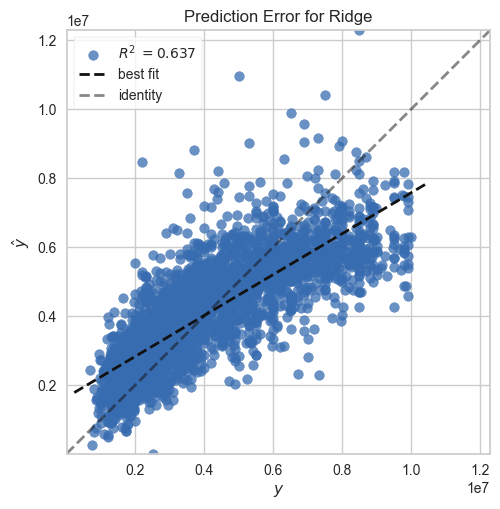

<Axes: title={'center': 'Prediction Error for Ridge'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [51]:
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import PredictionError
from yellowbrick.style import set_palette

set_palette('accent')
model = Ridge(alpha=100.0)
visualizer = PredictionError(model)

visualizer.fit(X_train, Y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, Y_test)  # Evaluate the model on the test data
visualizer.show()    

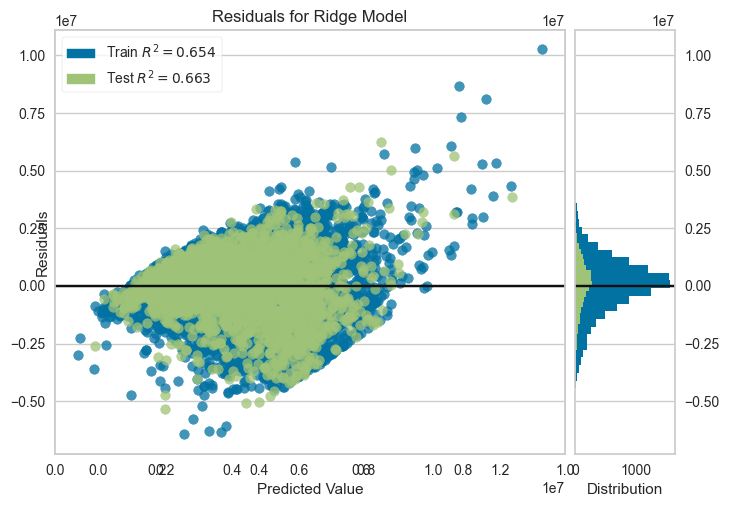

<Axes: title={'center': 'Residuals for Ridge Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [52]:
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import ResidualsPlot

model = Ridge(alpha=10.0)
visualizer = ResidualsPlot(model)

visualizer = ResidualsPlot(model)
visualizer.fit(X_train, Y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, Y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

# Conclusion

In based on data that is the area and type of accommodation, Model Lasso and Ridge give a similar output of 0.664 - 0.663. It is therefore concluded that the location of the accommodation affects the valuation.